THUẬT TOÁN ITERATIVE DEEPENING SEARCH

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

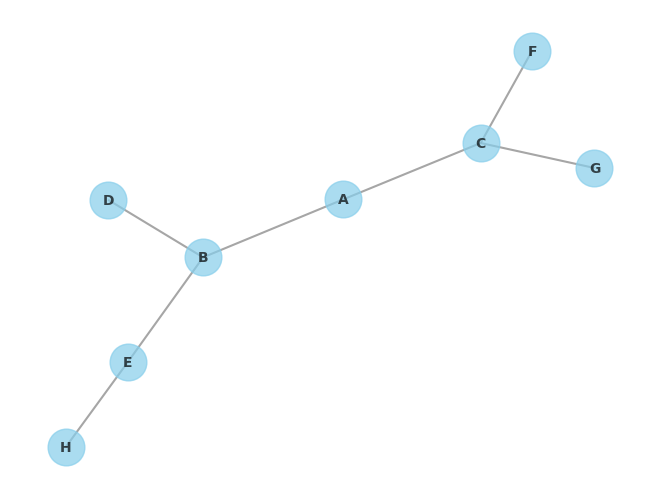

### Iterative Deepening Search with Depth Limit: 0 ###
| Node  | Frontiers                 | Reached                   | Depth      |
| A     | -                         | A                         | 0          |

### Iterative Deepening Search with Depth Limit: 1 ###
| Node  | Frontiers                 | Reached                   | Depth      |
| A     | -                         | A                         | 0          |
| C     | B                         | C, A                      | 1          |
| B     | -                         | B, C, A                   | 1          |

### Iterative Deepening Search with Depth Limit: 2 ###
| Node  | Frontiers                 | Reached                   | Depth      |
| A     | -                         | A                         | 0          |
| C     | B                         | C, A                      | 1          |
| G     | B, F                      | C, A, G                   | 2          |
| F     | B                         | F, C,

In [2]:
def iterative_deepening_search(graph, start_node, max_depth):
    for depth_limit in range(0, max_depth + 1):
        print(f"### Iterative Deepening Search with Depth Limit: {depth_limit} ###")
        depth_limited_search(graph, start_node, depth_limit)
        print()

def depth_limited_search(graph, start_node, depth_limit):
    visited = set()  # Tập hợp để lưu các đỉnh đã được thăm
    stack = [(start_node, 0)]  # Stack để theo dõi các đỉnh cần kiểm tra và độ sâu

    # In bảng tiêu đề
    print(f"| {'Node':<5} | {'Frontiers':<25} | {'Reached':<25} | {'Depth':<10} |")

    while stack:
        current_node, depth = stack.pop()  # Lấy đỉnh và độ sâu từ stack

        if current_node not in visited and depth <= depth_limit:
            visited.add(current_node)  # Đánh dấu đỉnh hiện tại là đã thăm

            # In thông tin hiện tại ra màn hình
            frontiers = ', '.join(node for node, _ in stack) if stack else '-'
            reached = ', '.join(visited)
            print(f"| {current_node:<5} | {frontiers:<25} | {reached:<25} | {depth:<10} |")

            # Thêm các đỉnh kề chưa được thăm vào stack với độ sâu tăng lên
            stack.extend((neighbor, depth + 1) for neighbor in graph[current_node] if neighbor not in visited)


example_graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F', 'G'],
    'D': ['B'],
    'E': ['B', 'H'],
    'F': ['C'],
    'G': ['C'],
    'H': ['E']
}

#VẼ TRỰC QUAN RA
G = nx.Graph(example_graph)

pos = nx.spring_layout(G)  # Chọn layout (cách sắp xếp các nút)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1.5, alpha=0.7)
plt.show()


# đỉnh bắt đầu là 'A' và giới hạn độ sâu là 2
max_depth = 2
iterative_deepening_search(example_graph, 'A', max_depth)
